#**Bank Marketing**

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y):




**Input variables:**

- bank client data:

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur", "student","blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

- Related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

- other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

- output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [1]:
!pip install optbinning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.3/211.3 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.8/409.8 KB 10.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.12 which is incompatible.
tensorflow-metadata 1.12.0 requires protobuf<4,>=3.13, but you have protobuf 4.21.12 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.12 which is incompatible.


In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.datasets import fetch_openml
bm = fetch_openml(name='bank-marketing', version=1)

In [4]:
df = bm['data']
df['V17'] = bm['target']
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,1
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,1
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,1
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,1
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17.0,nov,977.0,3.0,-1.0,0.0,unknown,2
45207,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17.0,nov,456.0,2.0,-1.0,0.0,unknown,2
45208,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17.0,nov,1127.0,5.0,184.0,3.0,success,2
45209,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17.0,nov,508.0,4.0,-1.0,0.0,unknown,1


In [5]:
df_cols = ["age","job","marital","education","default","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome","target"]

In [6]:
df.columns = df_cols
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,1
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,1
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,1
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,1
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,1


In [7]:
df = df.replace({'target': {"1": "0", "2": "1"}})

In [8]:
df.dtypes

age           float64
job          category
marital      category
education    category
default      category
balance       float64
housing      category
loan         category
contact      category
day           float64
month        category
duration      float64
campaign      float64
pdays         float64
previous      float64
poutcome     category
target         object
dtype: object

In [9]:
df['target'] = df['target'].astype(int)

In [10]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
target          2
dtype: int64

In [11]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,target
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


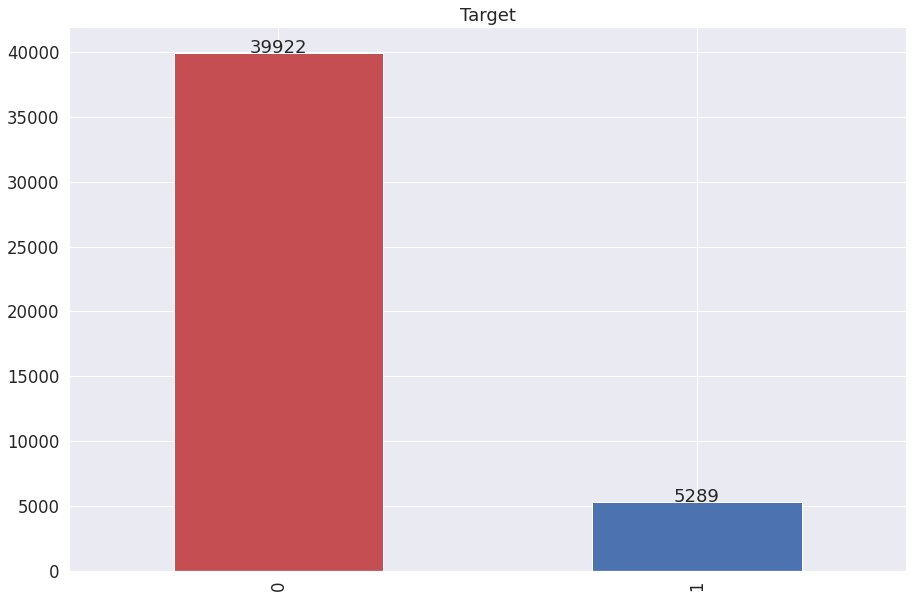

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
df["target"].value_counts().plot(kind='bar', color=['C3', 'C0'], figsize=(15, 10))
# 'C7' is Grey
# plt.xlabel("Loan Approval", labelpad=14)
# plt.ylabel("Count of Records", labelpad=14)
plt.title("Target")
df["target"].value_counts()

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
addlabels(df["target"].value_counts().index, df["target"].value_counts().values)

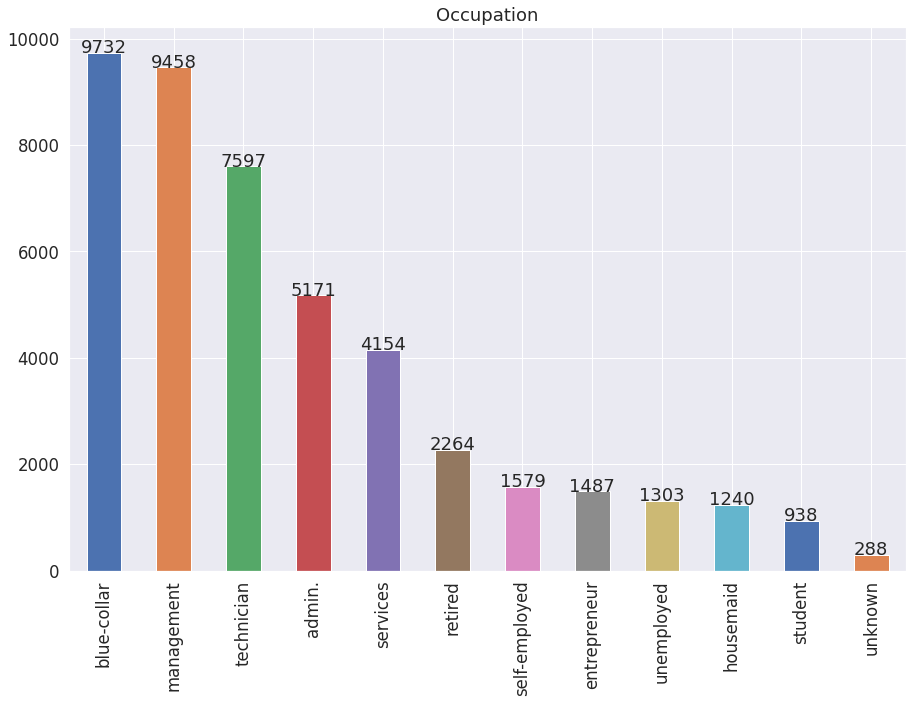

In [13]:
df["job"].value_counts().plot(kind='bar', color = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9'], figsize=(15, 10))
plt.title("Occupation")
addlabels(df["job"].value_counts().index, df["job"].value_counts().values)

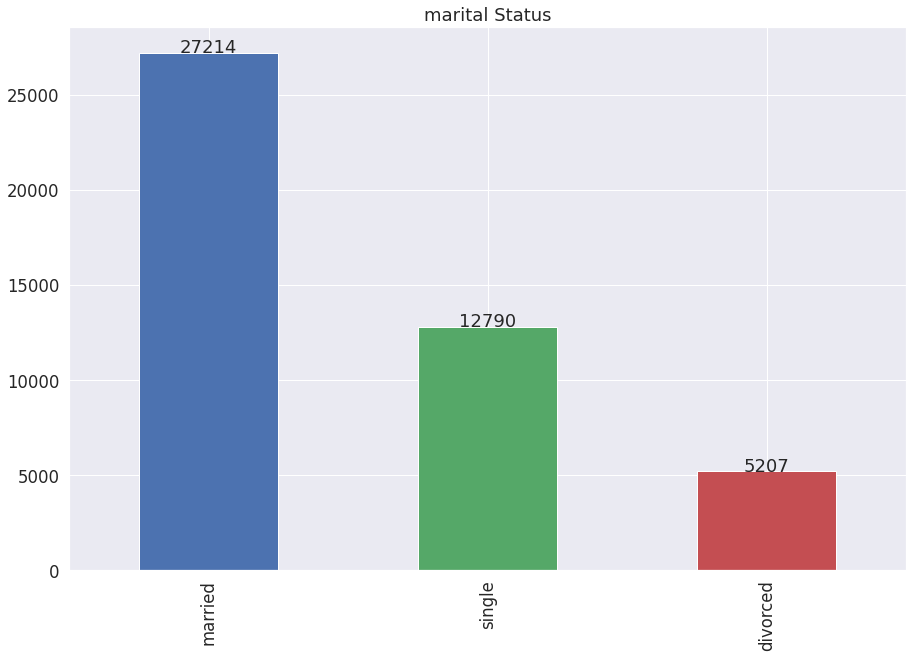

In [14]:
df["marital"].value_counts().plot(kind='bar', color=['C0','C2','C3'], figsize=(15, 10))
plt.title("marital Status")
addlabels(df["marital"].value_counts().index, df["marital"].value_counts().values)

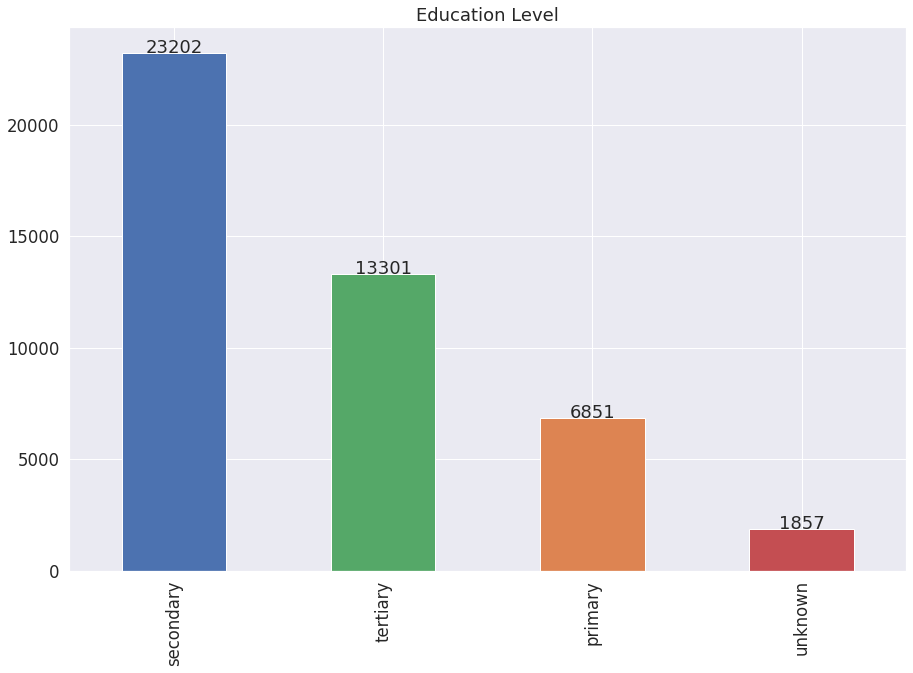

In [15]:
df["education"].value_counts().plot(kind='bar', color=['C0','C2','C1','C3'], figsize=(15, 10))
plt.title("Education Level")
addlabels(df["education"].value_counts().index, df["education"].value_counts().values)

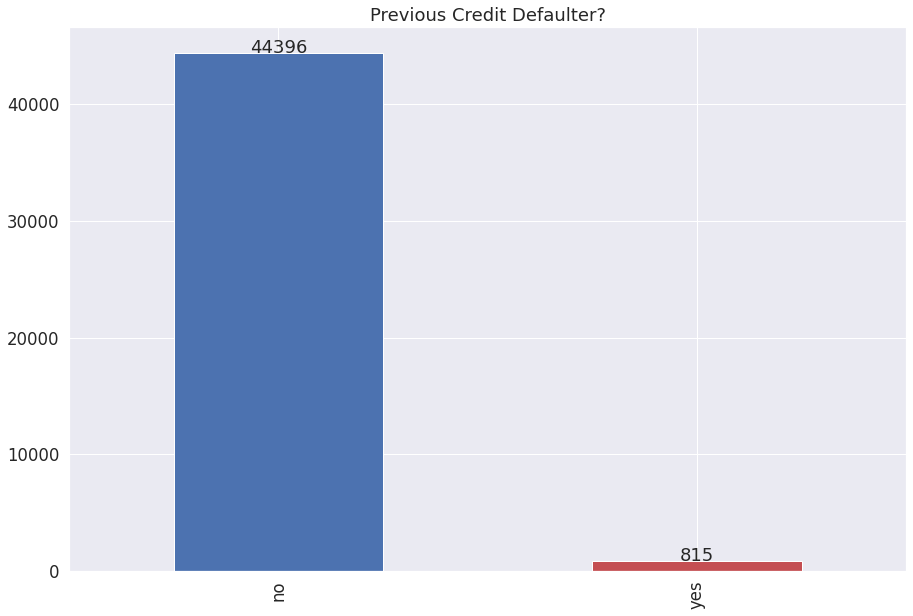

In [16]:
df["default"].value_counts().plot(kind='bar', color=['C0','C3'], figsize=(15, 10))
plt.title("Previous Credit Defaulter?")
addlabels(df["default"].value_counts().index, df["default"].value_counts().values)

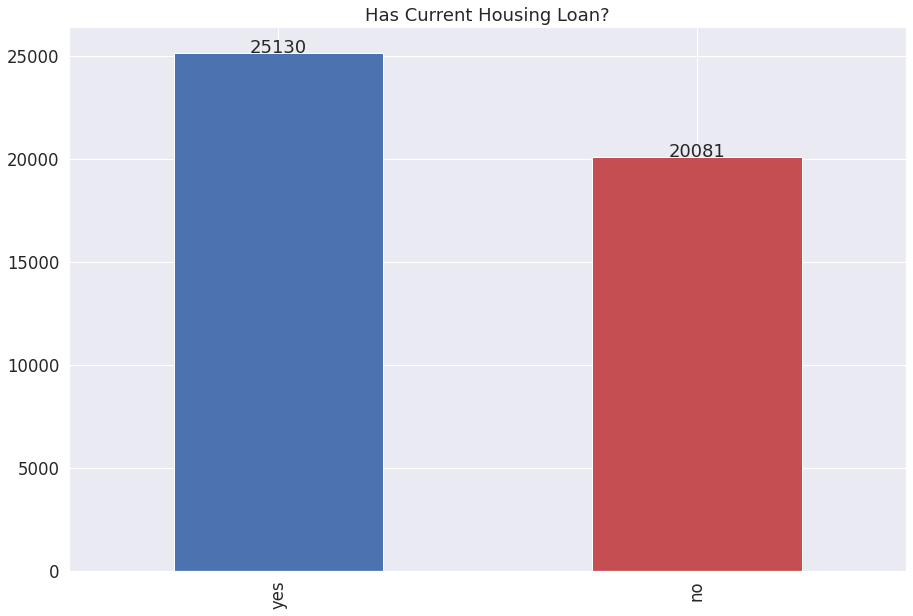

In [17]:
df["housing"].value_counts().plot(kind='bar', color=['C0','C3'], figsize=(15, 10))
plt.title("Has Current Housing Loan?")
addlabels(df["housing"].value_counts().index, df["housing"].value_counts().values)

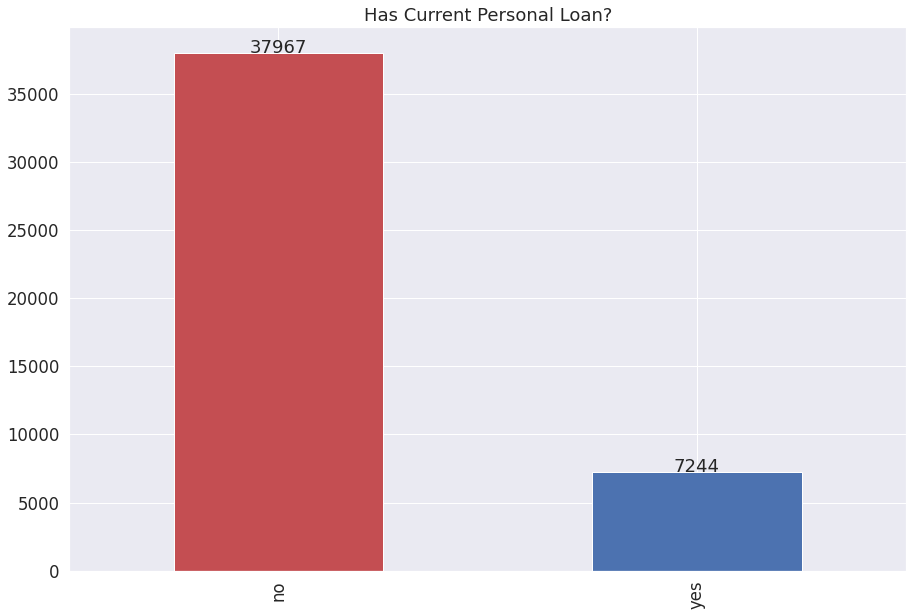

In [18]:
df["loan"].value_counts().plot(kind='bar', color=['C3','C0'], figsize=(15, 10))
plt.title("Has Current Personal Loan?")
addlabels(df["loan"].value_counts().index, df["loan"].value_counts().values)

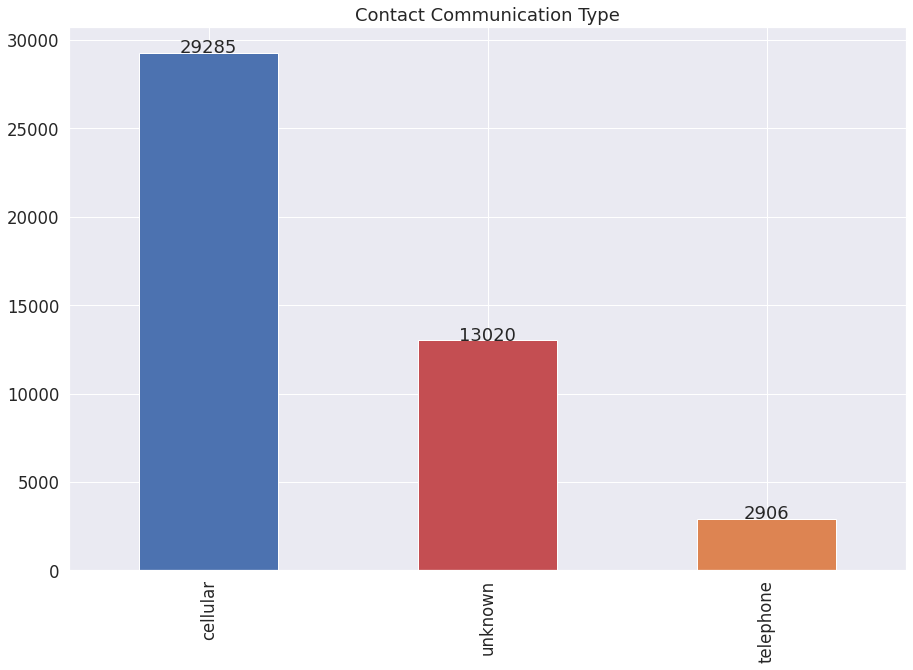

In [19]:
df["contact"].value_counts().plot(kind='bar', color=['C0','C3','C1'], figsize=(15, 10))
plt.title("Contact Communication Type")
addlabels(df["contact"].value_counts().index, df["contact"].value_counts().values)

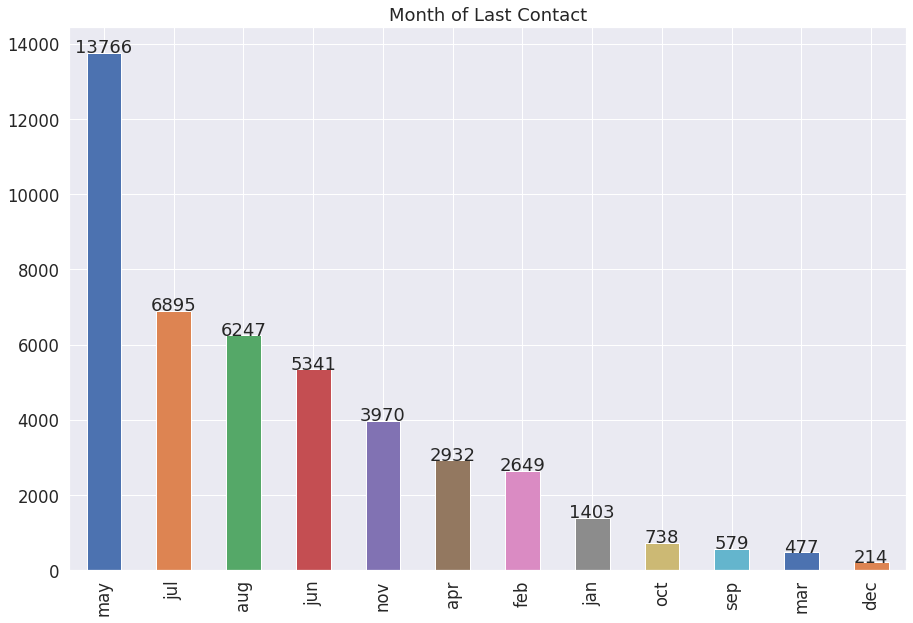

In [20]:
df["month"].value_counts().plot(kind='bar', color = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9'], figsize=(15, 10))
plt.title("Month of Last Contact")
addlabels(df["month"].value_counts().index, df["month"].value_counts().values)

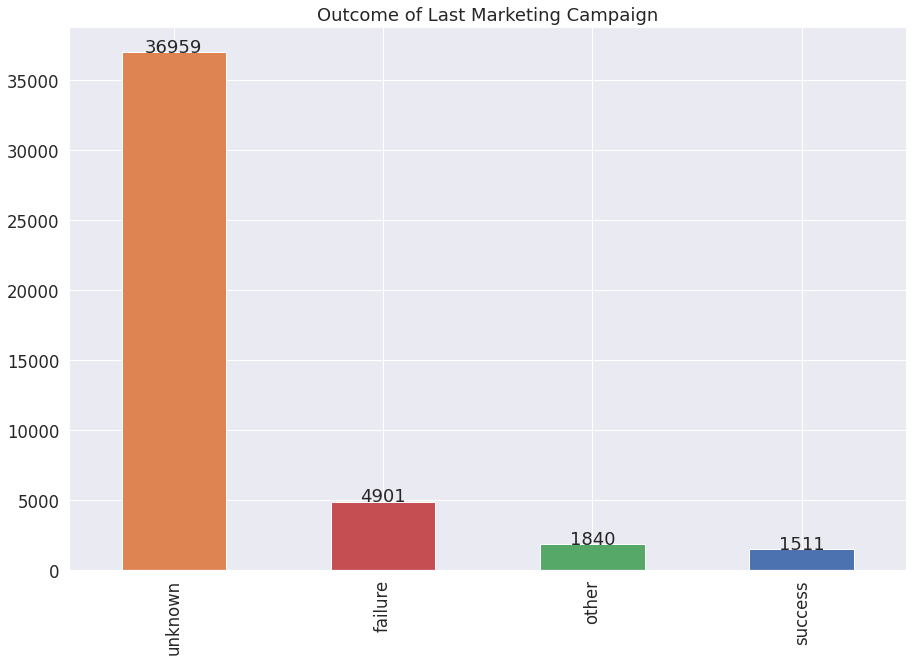

In [21]:
df["poutcome"].value_counts().plot(kind='bar', color=['C1','C3','C2','C0'], figsize=(15, 10))
plt.title("Outcome of Last Marketing Campaign")
addlabels(df["poutcome"].value_counts().index, df["poutcome"].value_counts().values)

In [22]:
def ft_understanding_num(data, skew=[], kurtosis=[]):
  for num_ft in data.describe().columns:
    skew.append('{:1.3f}'.format(df[num_ft].skew()))
    kurtosis.append('{:1.3f}'.format(df[num_ft].kurtosis()))
    # print("Skew : ", '{:1.3f}'.format(df[num_ft].skew()))
    # print("Kurtosis : ", '{:1.3f}'.format(df[num_ft].kurtosis()))
    fig, ax = plt.subplots(figsize=(15, 10))
    # sns.displot(df[num_ft], kde=True)
    sns.histplot(df[num_ft], kde=True, ax=ax)
  return skew, kurtosis

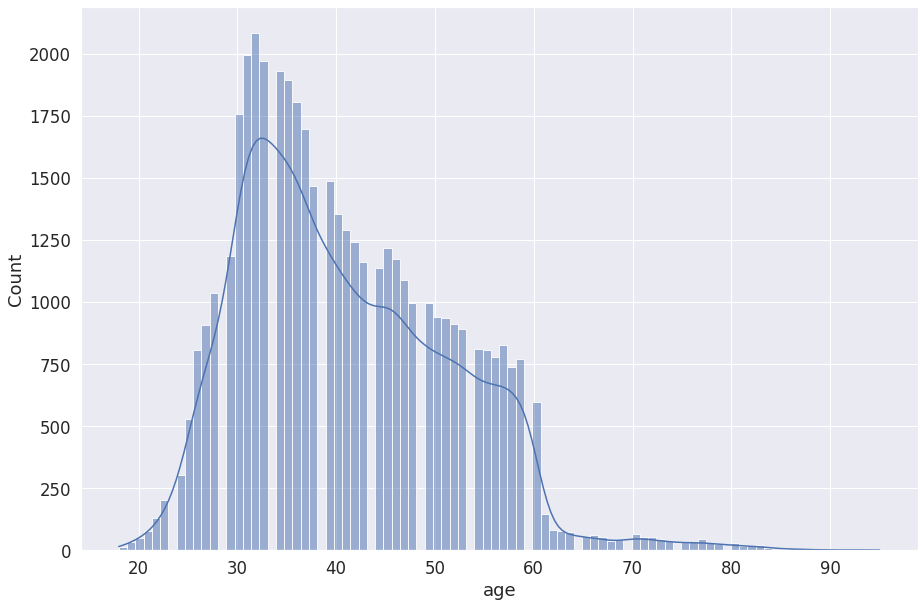

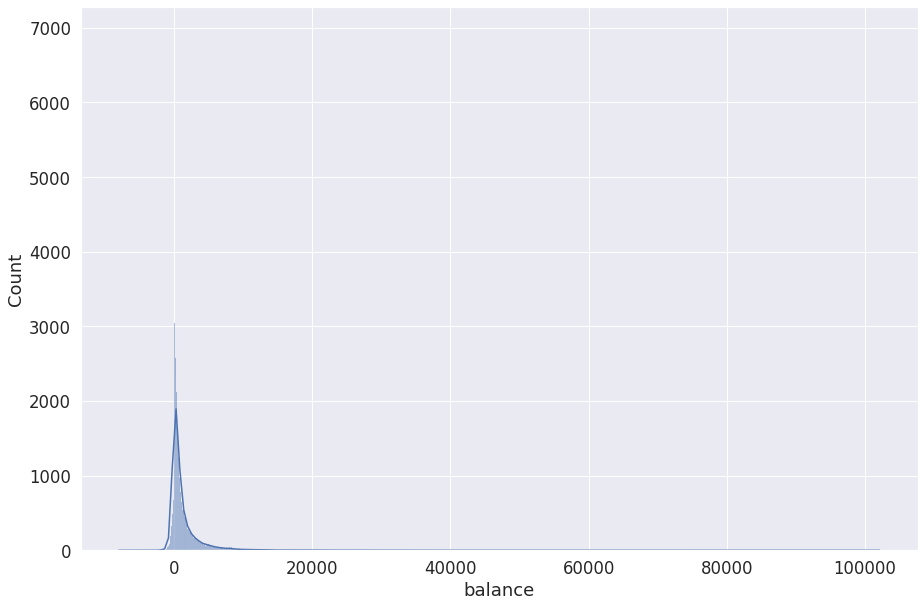

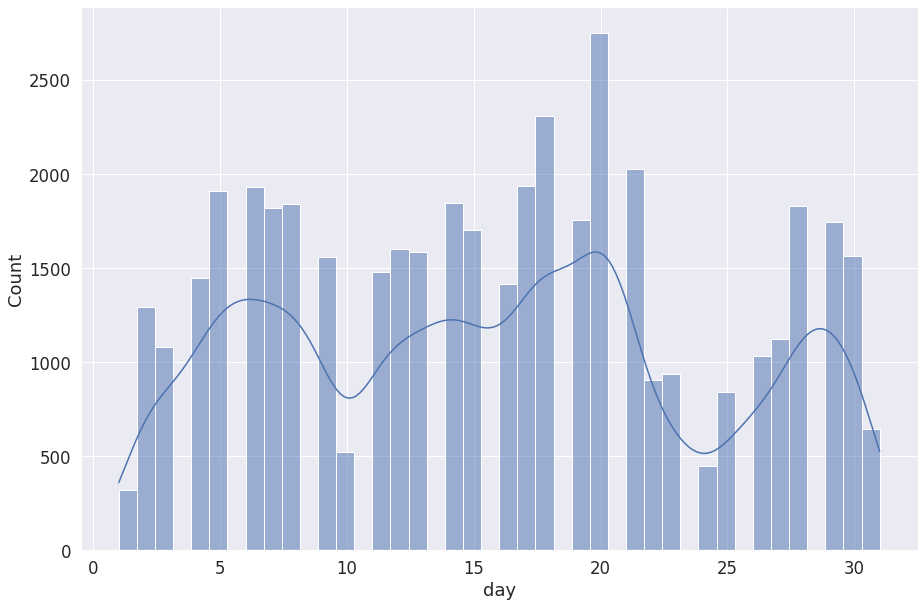

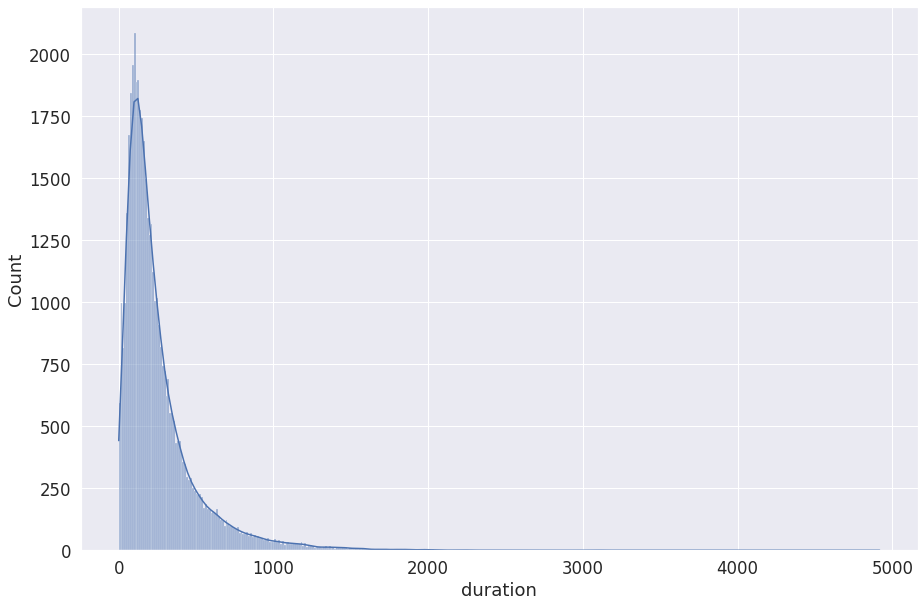

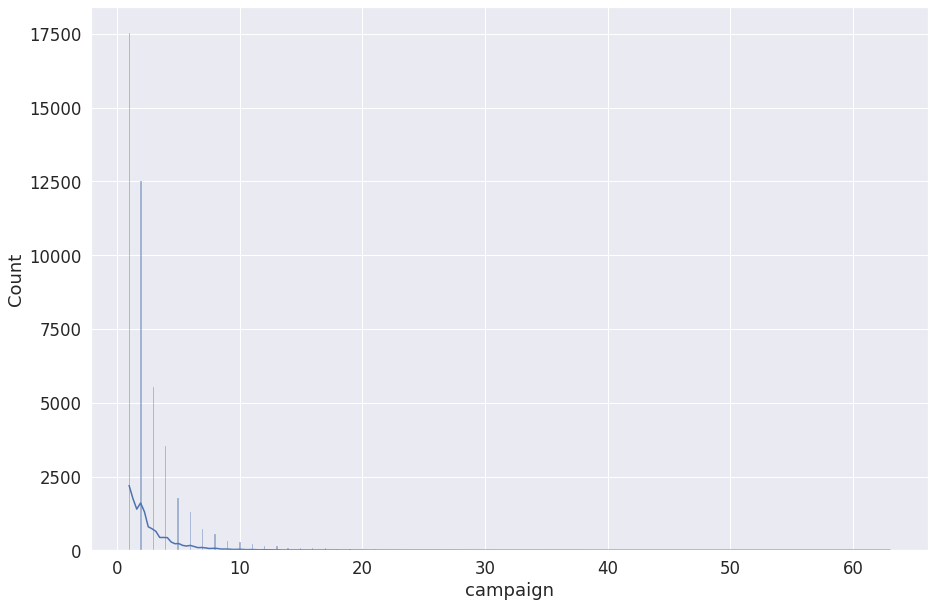

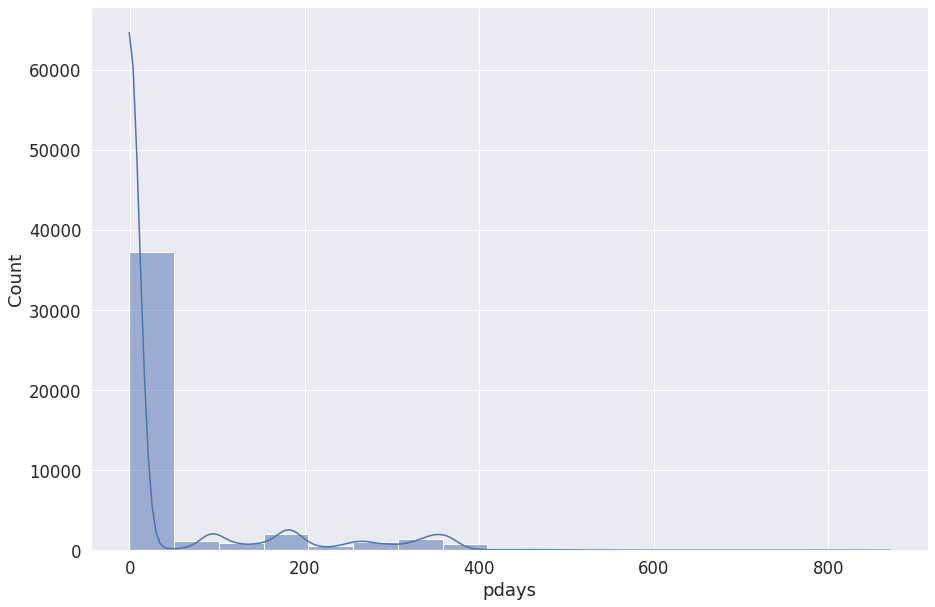

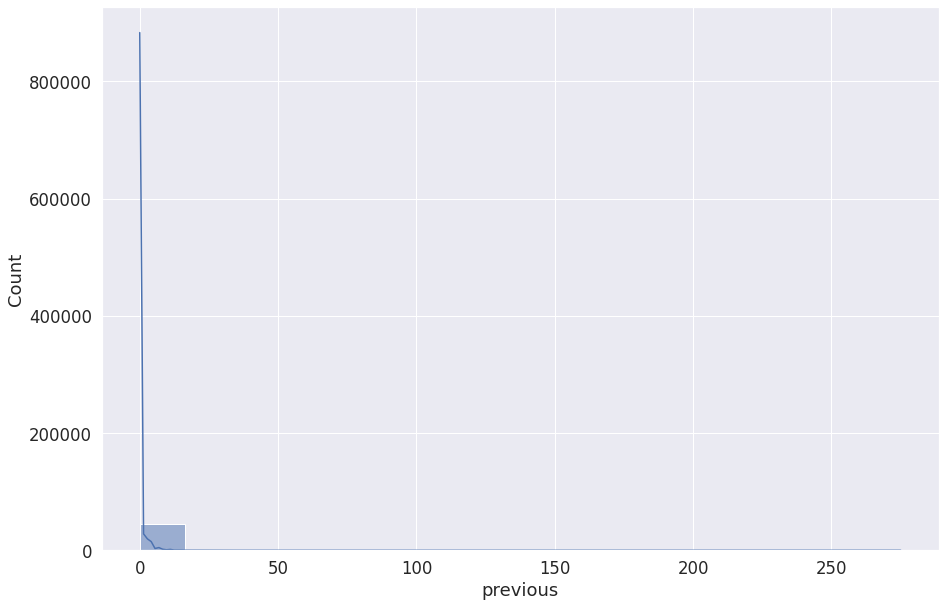

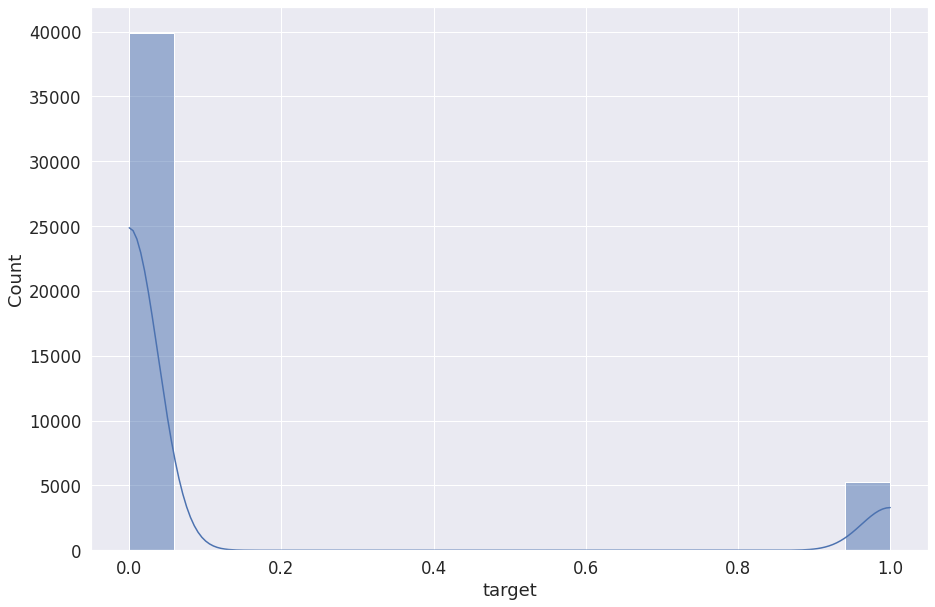

In [23]:
import pandas as pd
num_stats = pd.DataFrame()
num_stats["Columns"] = df.describe().columns
num_stats["Skew"], num_stats["Kurtosis"] = ft_understanding_num(df)

In [24]:
num_stats

,Columns,Skew,Kurtosis
0,age,0.685,0.320
1,balance,8.360,140.752
2,day,0.093,-1.060
3,duration,3.144,18.154
4,campaign,4.899,39.250
5,pdays,2.616,6.935
6,previous,41.846,4506.861
7,target,2.383,3.681


In [25]:
import optbinning

In [26]:
optb = optbinning.OptimalBinning(dtype='numerical')
optb.fit(df['age'], df['target'])
binning_table = optb.binning_table
display(binning_table.build())

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 29.50)",5273,0.116631,4345,928,0.175991,-0.477549,0.031815,0.003940
1,"[29.50, 31.50)",3753,0.083011,3330,423,0.112710,0.042057,0.000144,0.000018
2,"[31.50, 35.50)",7881,0.174316,7043,838,0.106332,0.107473,0.001932,0.000241
3,"[35.50, 37.50)",3502,0.077459,3137,365,0.104226,0.129826,0.001242,0.000155
4,"[37.50, 39.50)",2953,0.065316,2666,287,0.097189,0.207554,0.002598,0.000324
5,"[39.50, 43.50)",5049,0.111676,4599,450,0.089127,0.303048,0.009127,0.001137
6,"[43.50, 45.50)",2352,0.052023,2153,199,0.084609,0.360014,0.005870,0.000730
7,"[45.50, 51.50)",6129,0.135564,5566,563,0.091858,0.269854,0.008898,0.001109
8,"[51.50, 58.50)",5765,0.127513,5217,548,0.095056,0.232104,0.006283,0.000784
9,"[58.50, inf)",2554,0.056491,1866,688,0.269381,-1.023535,0.085302,0.010220


In [27]:
optb = optbinning.OptimalBinning(dtype='categorical')
optb.fit(df['job'], df['target'])
binning_table = optb.binning_table
display(binning_table.build())

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[blue-collar],9732,0.215257,9024,708,0.072750,0.523901,0.048292,0.005968
1,"[entrepreneur, housemaid]",2727,0.060317,2495,232,0.085075,0.354008,0.006596,0.000820
2,[services],4154,0.091880,3785,369,0.088830,0.306706,0.007681,0.000956
3,[technician],7597,0.168034,6757,840,0.110570,0.063634,0.000664,0.000083
4,"[unknown, self-employed, admin.]",7038,0.155670,6186,852,0.121057,-0.038841,0.000238,0.000030
5,"[management, unemployed]",10761,0.238017,9258,1503,0.139671,-0.203273,0.010626,0.001326
6,"[retired, student]",3202,0.070823,2417,785,0.245159,-0.8967,0.078800,0.009533
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,45211,1.000000,39922,5289,0.116985,,0.152897,0.018716


Feature Name :  age


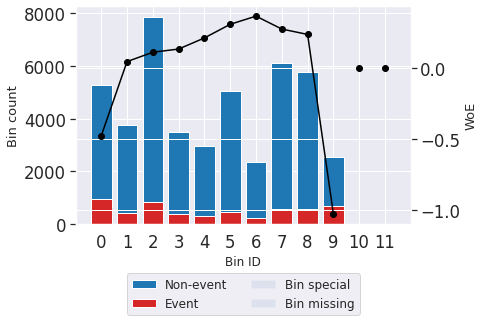

None

Feature Name :  job


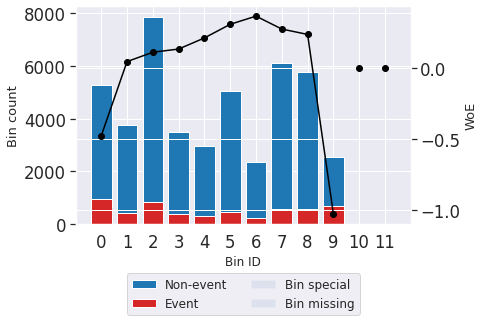

None

Feature Name :  marital


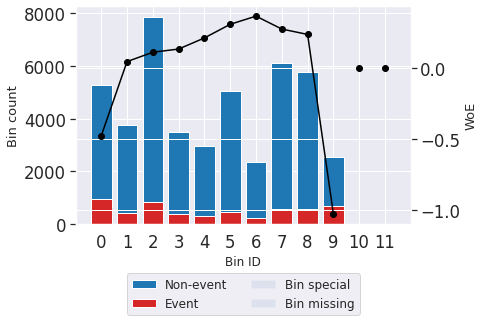

None

Feature Name :  education


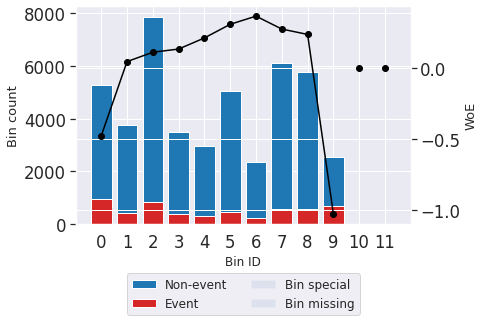

None

Feature Name :  default


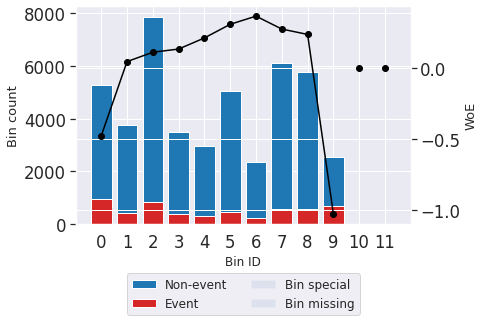

None

Feature Name :  balance


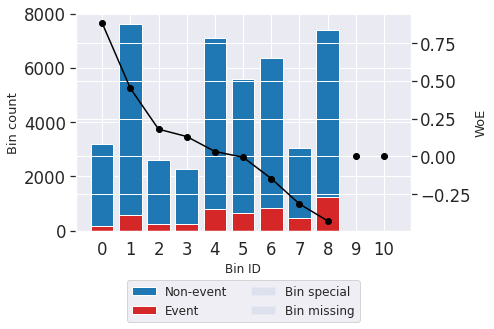

None

Feature Name :  housing


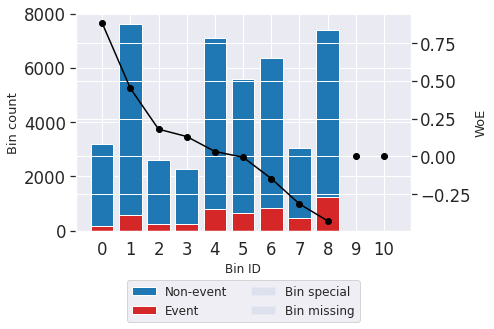

None

Feature Name :  loan


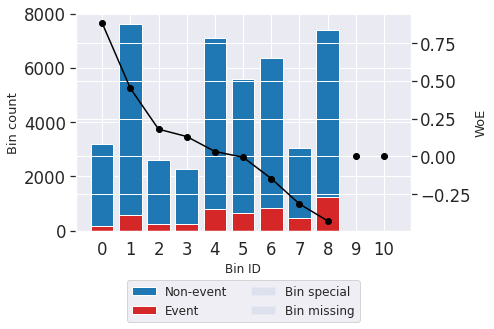

None

Feature Name :  contact


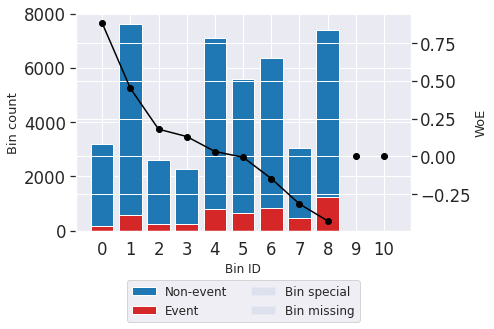

None

Feature Name :  day


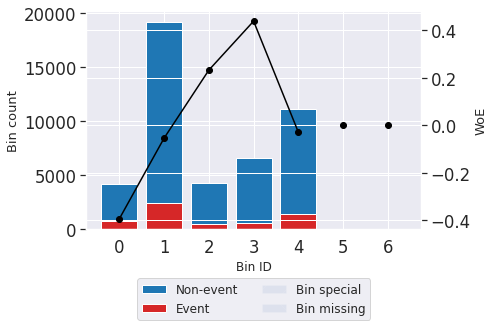

None

Feature Name :  month


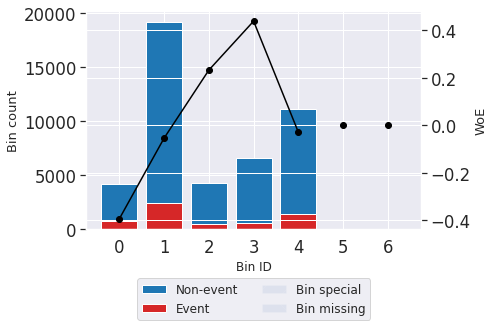

None

Feature Name :  duration


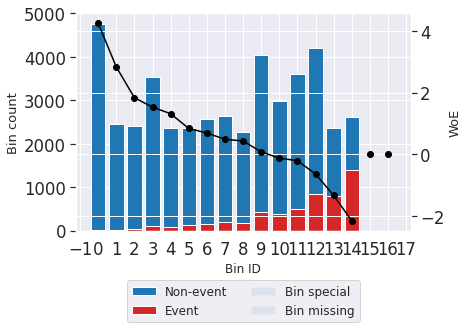

None

Feature Name :  campaign


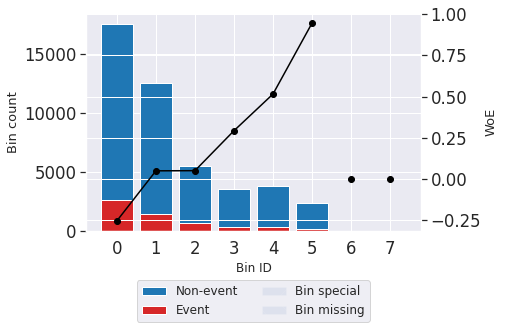

None

Feature Name :  pdays


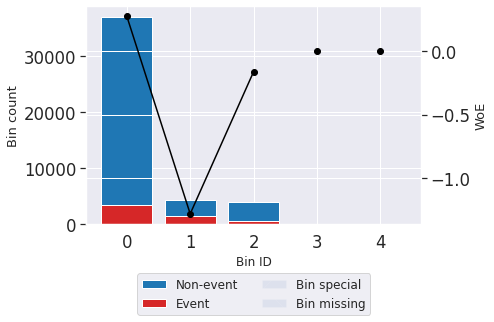

None

Feature Name :  previous


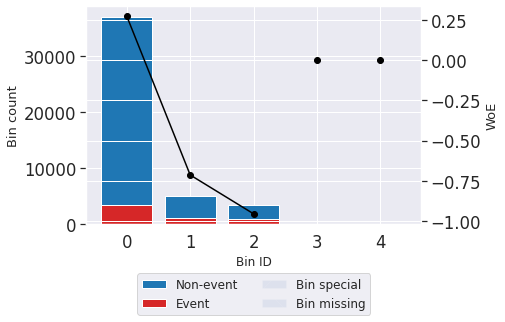

None

Feature Name :  poutcome


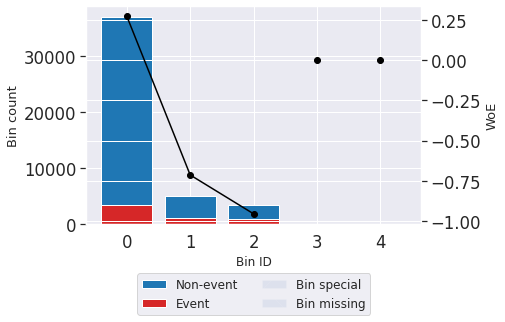

None

In [28]:
df_categorical = list(df.drop('target',axis=1).select_dtypes(include='object').columns) 
df_numerical = list(df.drop('target',axis=1).select_dtypes(include=['int64','float64']).columns)

iv_score_dict = {}
for col in df.drop('target',axis=1).columns:
  if col in df_numerical:
    opt_bins = optbinning.OptimalBinning(dtype='numerical')
    opt_bins.fit(df[col], df['target'])
  elif col in df_categorical: 
    opt_bins = optbinning.OptimalBinning(dtype='categorical')
    opt_bins.fit(df[col], df['target'])
  table = opt_bins.binning_table
  table.build()
  iv_score_dict[col] = table.iv
  print("Feature Name : ", col)
  display(table.plot(metric="woe"))

iv_score_df = pd.Series(iv_score_dict)
iv_score_df.sort_values(ascending=False, inplace=True)

In [29]:
iv_score_df = iv_score_df[iv_score_df >= 0.02]
iv_score_df

duration     1.679204
pdays        0.296385
previous     0.222933
poutcome     0.222933
age          0.153211
job          0.153211
marital      0.153211
education    0.153211
default      0.153211
balance      0.116706
housing      0.116706
loan         0.116706
contact      0.116706
campaign     0.084955
day          0.046051
month        0.046051
dtype: float64

In [30]:
weak_iv = [item for item in list(df.drop('target',axis=1).columns) if item not in list(iv_score_df.index)]
df = df.drop(weak_iv,axis=1)

In [31]:
cols = list(df.drop('target',axis=1).columns)
X = df[cols].values
y = df.target.values
y = y.astype(int)

In [32]:
binning_fit_params = {
    "age": {"monotonic_trend": "ascending"},
    "balance": {"monotonic_trend": "ascending"},
    "day": {"monotonic_trend": "ascending"},
    "duration": {"monotonic_trend": "ascending"},
    "campaign": {"monotonic_trend": "ascending"},
    "pdays": {"monotonic_trend": "ascending"},
    "previous": {"monotonic_trend": "ascending"}
}

In [33]:
binning_process = optbinning.BinningProcess(cols, categorical_variables = df_categorical, 
                                            binning_fit_params=binning_fit_params)

In [34]:
df.dtypes

age           float64
job          category
marital      category
education    category
default      category
balance       float64
housing      category
loan         category
contact      category
day           float64
month        category
duration      float64
campaign      float64
pdays         float64
previous      float64
poutcome     category
target          int64
dtype: object

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

clf = Pipeline(steps=[('binning_process', binning_process),
                      ('classifier', LogisticRegression(solver="lbfgs"))])

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
clf.fit(X_train, y_train)

Pipeline(steps=[('binning_process',
                 BinningProcess(binning_fit_params={'age': {'monotonic_trend': 'ascending'},
                                                    'balance': {'monotonic_trend': 'ascending'},
                                                    'campaign': {'monotonic_trend': 'ascending'},
                                                    'day': {'monotonic_trend': 'ascending'},
                                                    'duration': {'monotonic_trend': 'ascending'},
                                                    'pdays': {'monotonic_trend': 'ascending'},
                                                    'previous': {'monotonic_trend': 'ascending'}},
                                categorical_variables=[],
                                variable_names=['age', 'job', 'marital',
                                                'education', 'default',
                                                'balance', 'housing', 'loan',
          

In [38]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7952
           1       0.58      0.35      0.44      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.66      0.69      9043
weighted avg       0.87      0.89      0.88      9043



In [39]:
from sklearn.metrics import auc, roc_auc_score, roc_curve

probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

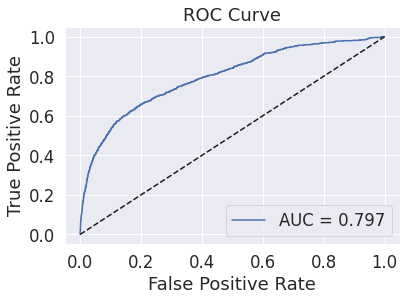

In [40]:
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label='AUC = {0:.3f}'.format(roc_auc))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()